# Job Market research for data analyst positions in the US

Name : Xiaotong Liu


## Part 1: Data collection and cleaning

In this report, we will focus on the data analyst position in the US. Using the code following we doing web scraping on indeed. After web scaping, we use `drop_duplicates()` for data cleaning and get 1097 job postings for data analyst positions in the US.

### Web scraping

In [ ]:
# import pandas as pd
# from bs4 import BeautifulSoup
# from datetime import datetime
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# pip install webdriver-manager

In [ ]:
# from webdriver_manager.chrome import ChromeDriverManager
# driver = webdriver.Chrome(ChromeDriverManager().install())

In [ ]:
# driver_path = "/Users/xxxxxt/Desktop/chromedriver"
# driver = webdriver.Chrome(executable_path=driver_path)

In [ ]:
# ## Enter a job position usa ds
# position = "data scientist"
# ## Enter a location (City, State or Zip or remote)
# locations = "USA"

# def get_url(position, location):
#     url_template = "https://www.indeed.com/jobs?q={}&l={}&vjk=0f5a89718688a3f8"
#     url = url_template.format(position, location)
#     return url

# url = get_url(position, locations)
# dataframe = pd.DataFrame(columns=["Title", "Company", "Location", "Rating", "Date", "Salary","Links"])

In [ ]:
# ## Number of postings to scrape
# postings = 1500

# jn=0
# for i in range(0, postings, 10):
#     driver.get(url + "&start=" + str(i))
#     driver.implicitly_wait(3)

#     jobs = driver.find_elements(By.CLASS_NAME, 'job_seen_beacon')

#     for job in jobs:
#         result_html = job.get_attribute('innerHTML')
#         soup = BeautifulSoup(result_html, 'html.parser')
        
#         jn += 1
        
#         liens = job.find_elements(By.TAG_NAME, "a")
#         links = liens[0].get_attribute("href")
        
#         title = soup.select('.jobTitle')[0].get_text().strip()
#         company = soup.select('.companyName')[0].get_text().strip()
#         location = soup.select('.companyLocation')[0].get_text().strip()
#         try:
#             salary = soup.select('.salary-snippet-container')[0].get_text().strip()
#         except:
#             salary = 'NaN'
#         try:
#             rating = soup.select('.ratingNumber')[0].get_text().strip()
#         except:
#             rating = 'NaN'
#         try:
#             date = soup.select('.date')[0].get_text().strip()
#         except:
#             date = 'NaN'
       
#         dataframe = pd.concat([dataframe, pd.DataFrame([{'Title': title,
#                                           "Company": company,
#                                           'Location': location,
#                                           'Rating': rating,
#                                           'Date': date,
#                                           "Salary": salary,
#                                           "Links": links}])], ignore_index=True)
#         print("Job number {0:4d} added - {1:s}".format(jn,title))

# driver.quit()

In [ ]:
# Links_list = dataframe['Links'].tolist()
# import random
# import time
# import numpy as np

In [ ]:
# # Scrape full job descriptions
# dataframe["Descriptions"] = np.nan

# driver = webdriver.Chrome(executable_path=driver_path)
# print("before", len(Links_list))
# Links_list = list(set(Links_list))
# print("after", len(Links_list))

# descriptions=[]
# for idx, i in enumerate(Links_list[:len(Links_list)]):
#     print(f"Processing {idx+1} out of {len(Links_list)}.")
#     driver.get(i)
#     driver.implicitly_wait(random.randint(3, 8))
#     jd = driver.find_element(By.XPATH, '//div[@id="jobDescriptionText"]').text
#     descriptions.append(jd)
#     time.sleep(random.randint(5,10))

#     dataframe.loc[idx, 'Descriptions'] = jd

In [ ]:
# driver.quit()

In [ ]:
# # Convert the dataframe to a csv file
# date = datetime.today().strftime('%Y-%m-%d')
# dataframe.to_csv(date + "_" + position + "_" + locations + ".csv", index=False)

In [ ]:
# #data cleaning and drop duplicate
# df = pd.read_csv("US_ds.csv",encoding= 'unicode_escape')
# result_df = df.drop_duplicates()

# result_df.to_csv('webscraping_results_assignmnet3.csv')

### Read Data

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("webscraping_results_assignmnet3.csv")

In [ ]:
data.shape

(1097, 8)

## Part 2: Exploratory data analysis and feature engineering

First we create a dictionary `skills_keywords_dict`, in which contains common technical skills and business skills data analyst needed. Here since some key words like `R` may appear in some other words, so we specify different situation for the appearance of the keywords.

In [ ]:
# dictionary with skills
skill_dict = {'Excel': ['Excel/'],'Python': ['Python'],'R': ['R ', ' R ', 'R,', 'R/'], 'Java': ['Java', 'JVM'],'Scala': ['Scala'],'C/C++': ['C/C++', 'C++', ' C '],
        'MATLAB': ['MATLAB'],'SAS': ['SAS/'],'SQL/databases': ['SQL', 'databases'],'Oracle':['Oracle'],'SPSS': ['SPSS'],'Stata': ['Stata'],'Machine Learning': ['Machine Learning', 'ML'],
        'Data Mining/Analytics': ['Data Mining', 'DM', 'Analytics'],'NLP': ['Natural Language Processing', 'NLP'],'Visualisation': ['Visualisation', 'Visualization'],
        'Big Data': ['Big Data', 'Spark', 'kafka', 'Hive','beam', 'Hadoop', 'MapReduce', 'Hbase','Coudera', 'Hortonworks'],'AWS Cloud': ['AWS/'],
        'Probability': ['probablity', 'probability theory'],'Support Vector Machines': ['SVM', 'Support vector machines'],
        'Neural Networks': ['Neural Networks', 'ANN', 'MLP', 'CNN', 'Tensorflow', 'Keras', 'Theano'],
        'GCP': ['GCP'],'Jason': ['Jason'],'xml': ['xml'],'Azure': ['Azure'],'Google Cloud': ['Google Cloud'],'Mathematics': ['Mathematics'],'IBM': ['IBM'],
        'Algebra': ['Algebra'],'Statistics' :  ['Statistics'],'Operations research': ['Operations research'],'DevOps': ['DevOps', 'TDD', 'test-driven'],
        'Git':['GitHub', 'Git', 'version control'],
        
        # business skills
        'presentation' : ['communication', 'presentation'],'management' : ['management', 'Data management'],'agile' : ['agile'],'SDLC' : ['SDLC', 'sdlc', 'software development', 'lifecycle'],
        'decision making' : ['decision making', 'decision analysis'],'problem solving': ['problem solving'],'Team building': ['Team leadership', 'team building'],
        'project_management': ['project management'],'leadership': ['leadership'],'consulting': ['consulting', 'consultant']
    }

Since the larger the number of the skill appears in the description, the skill is assumed to be more important, so here we first convert the job description column into dummy variable for each skills, with 0 represents the skill does not appear in the job description and 1 represents the skill appear in the job description.

In [ ]:
for ind in data.index:
  for skill_category, skills in skill_dict.items():
    category_found = 0

    for skill in skills:
      if (data["Descriptions"][ind]).find(skill) != -1:
        category_found = 1

    data.loc[ind, skill_category] = category_found

Here are some examples of our dataset after converting.

In [ ]:
data.head(5)

,Title,Company,Location,Rating,Date,Salary,Links,Descriptions,Excel,Python,...,presentation,management,agile,SDLC,decision making,problem solving,Team building,project_management,leadership,consulting
0,Lead Data Scientist (Remote),OBMedia,Remote,4.0,PostedPosted 9 days ago,"$160,000 - $230,000 a year",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Who You Are\nAs a BEN data scientist, you will...",0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Data Scientist,"Shaw Industries Group, Inc.",Remote,3.8,PostedPosted 11 days ago,NaN,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Description of Duties: At eimagine, we know th...",0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Senior Data Scientist,Altria,"Remote in Richmond, VA 23230",4.1,PostedPosted 2 days ago,NaN,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Salary: commensurate with experience\nReferenc...,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,Data Scientist - NLP,"Ursus, Inc.","Remote in New York, NY 10001",4.9,PostedPosted 30+ days ago,$55.29 - $69.12 an hour,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Responsibilities:\nUnderstand and translate bu...,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Data Scientist,Centrifuge LLC,Remote,NaN,Hiring ongoing,"$77,768 - $122,282 a year",https://www.indeed.com/company/centrifuge-llc/...,This is a remote position open to any qualifie...,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


After that, we count the number of `1` for each skill and add one row to our dataframe called `count`. Here the value of `count` represents the number of appearance for each skill.

In [ ]:
data.loc['count'] = (data).sum(axis=0)

Then we visualize the wordcloud for technical/hard skills, business/soft skills and all skills respectively.

### Wordcloud of technical/hard skills

In [ ]:
data_tech = data[['Excel','Python','R', 'Java','Scala','C/C++','MATLAB','SAS','SQL/databases','Oracle','SPSS',
        'Stata','Machine Learning','Data Mining/Analytics','NLP','Visualisation','Big Data','AWS Cloud','Probability',
        'Support Vector Machines','Neural Networks','GCP','Jason','xml','Azure','Google Cloud','Mathematics',
        'IBM','Algebra','Statistics','Operations research','DevOps','Git']]

In [ ]:
tech_count = data_tech.loc['count'].sort_values(ascending=False)

In [ ]:
tech_count_df = pd.DataFrame(tech_count)

Here we first use bar chart to have a rough understanding the overall count (ranking) for each skill.

<Figure size 1080x720 with 0 Axes>

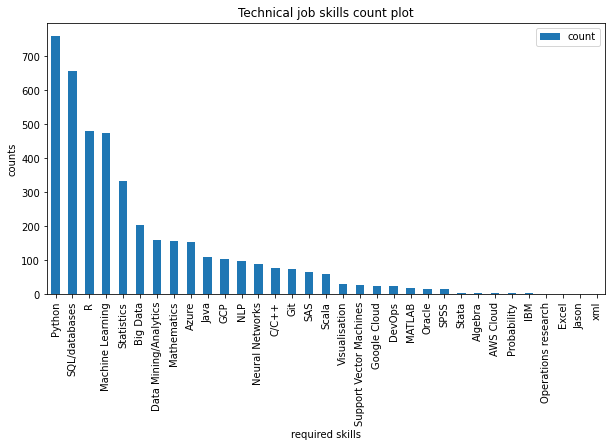

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
tech_count_df.plot.bar()
plt.title('Technical job skills count plot')
plt.xlabel('required skills')
plt.ylabel('counts')
plt.show()

Now we will plot wordcloud for data visualization, which could help the reader of the report have direct understanding of the importance for tech/hard skills.

In [ ]:
tech_count_df = tech_count_df.reset_index()

In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pylab import rcParams

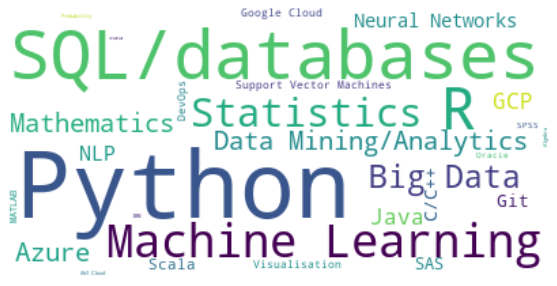

In [ ]:
d = {}
for a, x in tech_count_df.values:  #where bag is a pandas DataFrame with columns words and counts
    d[a] = x

wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=d)

rcParams['figure.figsize'] = 10,5
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

From the wordclound above, we could notice directly that `Python`, `SQL/databases`, `R`, `Machine Learning`, `Statistics` are relative important compared other skills.

### Wordcloud of business/soft skills

In the same way, now we will plot the wordcloud for business/soft skills.

In [ ]:
data_soft = data[['presentation','management','agile','SDLC','decision making','problem solving','Team building','project_management','leadership','consulting']]

In [ ]:
soft_count = data_soft.loc['count'].sort_values(ascending=False)

In [ ]:
soft_count_df = pd.DataFrame(soft_count)

<Figure size 1080x720 with 0 Axes>

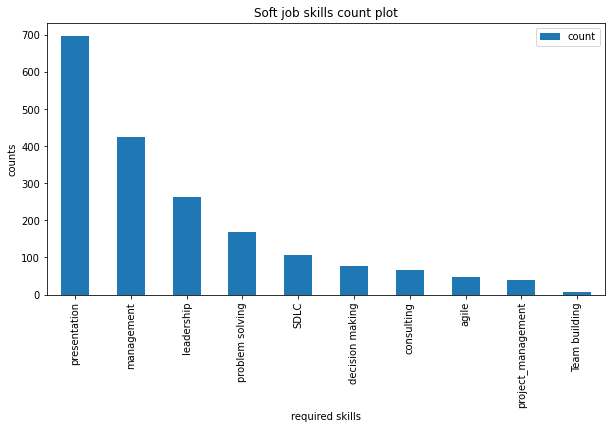

In [ ]:
plt.figure(figsize=(15,10))
soft_count_df.plot.bar()
plt.title('Soft job skills count plot')
plt.xlabel('required skills')
plt.ylabel('counts')
plt.show()

In [ ]:
soft_count_df = soft_count_df.reset_index()

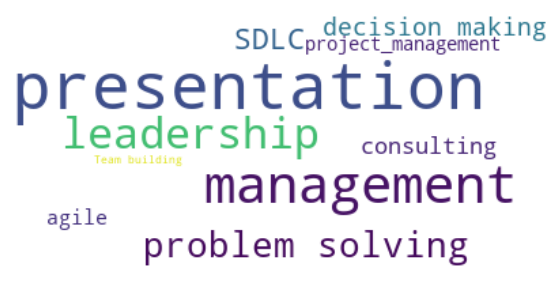

In [ ]:
d = {}
for a, x in soft_count_df.values:  #where bag is a pandas DataFrame with columns words and counts
    d[a] = x
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=d)

rcParams['figure.figsize'] = 10, 5
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

From the wordclound above, we could notice directly that `presentation`, `management`, `leadership`, `problem solving` are relative important compared other soft skills.

### Wordcloud of all skills

Now we will plot the wordcloud of all skills using the same way as before.

In [ ]:
data_all_skills = data[['Excel','Python','R','Java','Scala','C/C++','MATLAB','SAS','SQL/databases','Oracle',
        'SPSS','Stata','Machine Learning','Data Mining/Analytics','NLP','Visualisation','Big Data',
        'AWS Cloud','Probability','Support Vector Machines','Neural Networks','GCP','Jason',
        'xml','Azure','Google Cloud','Mathematics','IBM','Algebra','Statistics','Operations research',
        'DevOps','Git','presentation','management','agile','SDLC','decision making','problem solving',
        'Team building','project_management','leadership','consulting']]

In [ ]:
skills_count = data_all_skills.loc['count'].sort_values(ascending=False)

In [ ]:
skills_count_df = pd.DataFrame(skills_count)

<Figure size 1080x720 with 0 Axes>

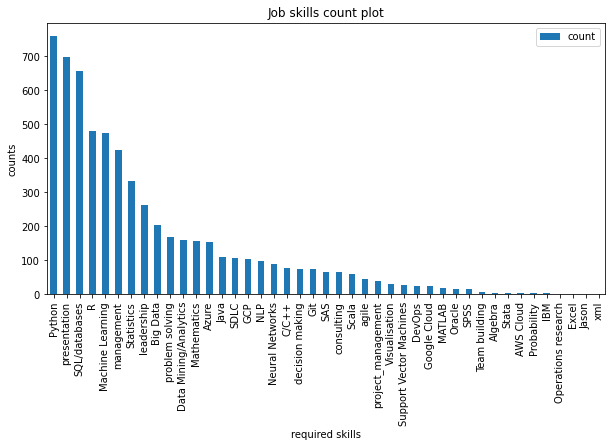

In [ ]:
plt.figure(figsize=(15,10))
skills_count_df.plot.bar()
plt.title('Job skills count plot')
plt.xlabel('required skills')
plt.ylabel('counts')
plt.show()

In [ ]:
skills_count_df = skills_count_df.reset_index()

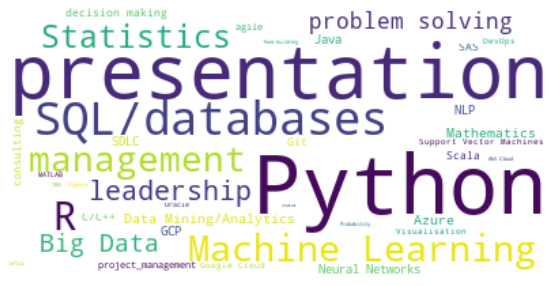

In [ ]:
d = {}
for a, x in skills_count_df.values:  
    d[a] = x
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=d)

rcParams['figure.figsize'] = 10, 5
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

From the wordclound above, we could notice directly that `Python`, `presentation`, `SQL/database`, `R`, `Machine Learning` are relative important compared other skills.

## Part 3: Hierarchical clustering implementation

### Hierarchical clustering for technical/hard skills

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
X_tech = data_tech[:-1]

In [ ]:
X_tech_val = X_tech.values

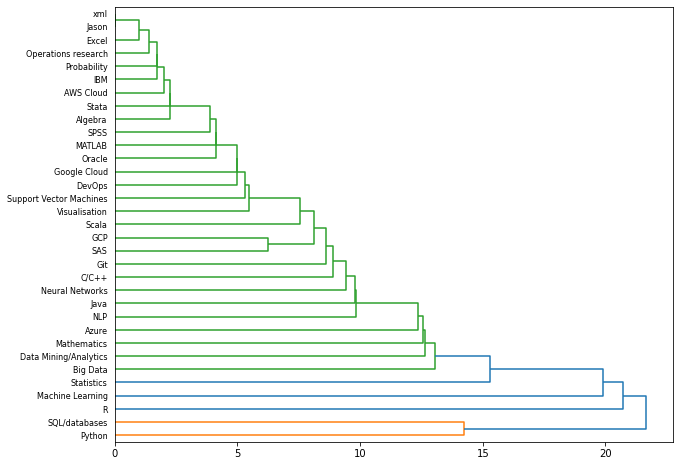

In [ ]:
skill_tech = X_tech.columns.values
fig, ax = plt.subplots(1,1, figsize=(10, 8))
z = linkage(X_tech_val.T)
dn = dendrogram(z, orientation='right')
labels = skill_tech[dn['leaves']]
ax.set_yticklabels(labels)
plt.show()

### Hierarchical clustering for business/soft skills

In [ ]:
X_soft = data_soft[:-1]

In [ ]:
X_soft_val = X_soft.values

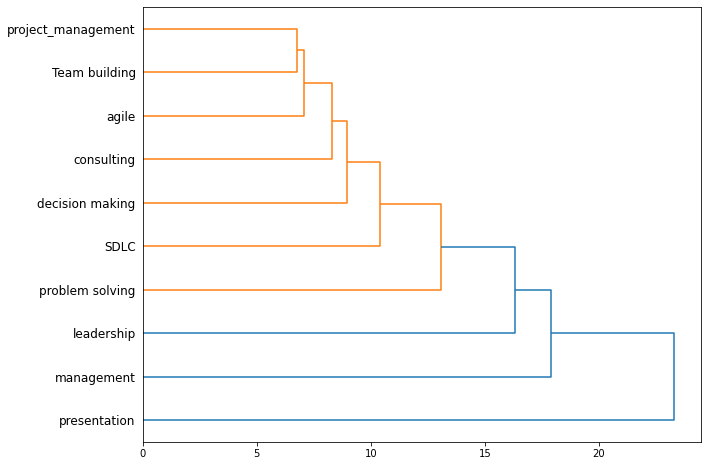

In [ ]:
skill_soft = X_soft.columns.values
fig, ax = plt.subplots(1,1, figsize=(10, 8))
z = linkage(X_soft_val.T)
dn = dendrogram(z, orientation='right')
labels = skill_soft[dn['leaves']]
ax.set_yticklabels(labels)
plt.show()

### Hierarchical clustering for all skills

In [ ]:
X_all = data_all_skills[:-1]

In [ ]:
X_all_val = X_all.values

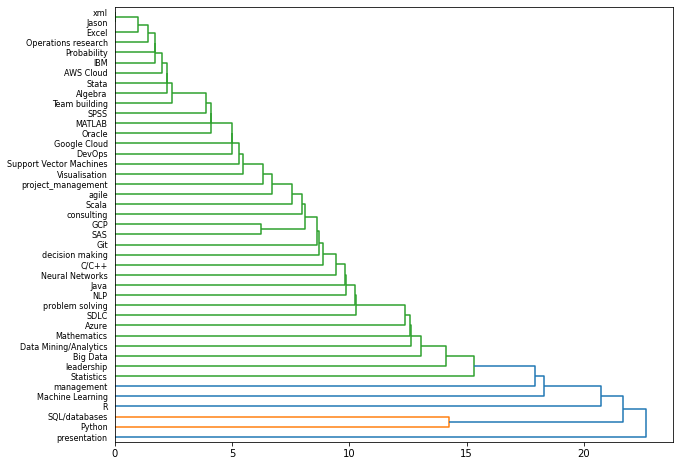

In [ ]:
skill_all = X_all.columns.values
fig, ax = plt.subplots(1,1, figsize=(10, 8))
z = linkage(X_all_val.T)
dn = dendrogram(z, orientation='right')
labels = skill_all[dn['leaves']]
ax.set_yticklabels(labels)
plt.show()

From skills with techs hierarchical plot, we have 7 clusters (here we divide clusters in green into four clusters). From skills with soft skills, hierarchical plot, we have 2 clusters. So we have 9 clusters in total. 

## Part 4: K-Mean clustering implementation

Here we use K-Means clustering to cluster each skill. Since for dataset `X_all` we have dimension 1097 (number of sample) * 43 (number of skill), so we first transpose the dataset, so that we could cluster skills rather than samples.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X_all_trans = X_all.T

In [ ]:
X_all_trans

In order to determine the number of cluster, we use elbow method to help us.
In elbow method, we would choose a value of k where the SSE begins to flatten out and we see an inflection point. If we choose k from 8-12, we may not have  the right k, so in order to have a accurate value for number of cluster, we choose k from 1 to 12. 

In [ ]:
distortions = []
K = range(1,13,1)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_all_trans)
    distortions.append(kmeanModel.inertia_)

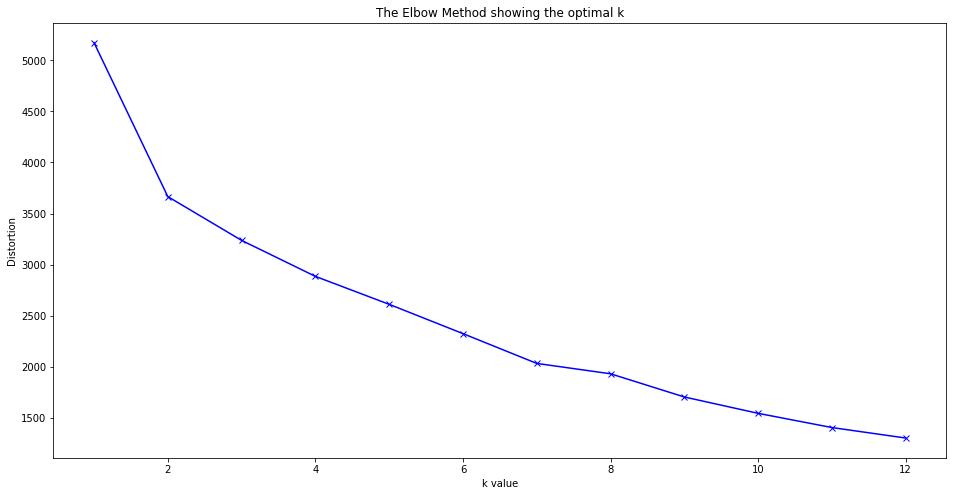

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions,'bx-')
plt.xlabel('k value')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the plot above, since we need to design a sequence of 8-12 courses, so we choose we choose `k = 9`, at which the slope of the line changed. Next we will implement K-Mean model with 9 clusters.

Here we first apply PCA  before K-Means clustering, since PCA improves the clustering results in practice (noise reduction). Since we want to keep in 2D, so we apply `PCA(2)` to our dataset.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
X_all_trans_reduced = pca.fit_transform(X_all_trans)

Then we build K-Mean clustering with 9 clusters and fit the model to each skills.

In [ ]:
import numpy as np
kmeanModel = KMeans(n_clusters=9)
label_kmeans = kmeanModel.fit_predict(X_all_trans_reduced)

And use scatterplot to visualize the cluster result.

In [ ]:
labels = np.unique(label_kmeans)

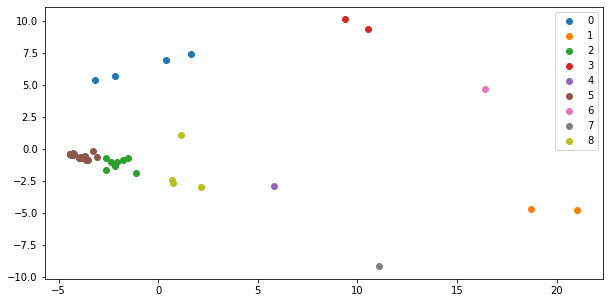

In [ ]:
for i in labels:
  plt.scatter(X_all_trans_reduced[label_kmeans==i,0], X_all_trans_reduced[label_kmeans==i,1], label = i)
plt.legend()
plt.show()

In order to know the clustering in detail, we combine labels with skills. 

In [ ]:
X_all_trans["pred"] = label_kmeans

In [ ]:
for p in range(0,10):
  cat = X_all_trans[X_all_trans["pred"] == p]

In [ ]:
X_cat = X_all_trans.iloc[:,-1]

In [ ]:
X_cat

Excel                      5
Python                     1
R                          7
Java                       2
Scala                      2
C/C++                      2
MATLAB                     5
SAS                        0
SQL/databases              1
Oracle                     5
SPSS                       5
Stata                      5
Machine Learning           3
Data Mining/Analytics      8
NLP                        2
Visualisation              5
Big Data                   8
AWS Cloud                  5
Probability                5
Support Vector Machines    5
Neural Networks            2
GCP                        0
Jason                      5
xml                        5
Azure                      8
Google Cloud               5
Mathematics                8
IBM                        5
Algebra                    5
Statistics                 4
Operations research        5
DevOps                     5
Git                        2
presentation               6
management    

From the elbow plot above, when we have 9 clusters, the SSE begins to flatten out and we see an inflection pointfor K-Mean clustering, so I choose 9 clusters, with each cluster and its related skills as following:
1. Management
2. Big Data
3. Python and SQL/databases
4. SAS, GCP, problem solving and leadership     
5. presentation
6. Statistics
7. R
8. Machine Learning
9. Excel, Java,Scala, C/C++, MATLAB, Oracle, SPSS, Stata, Data Mining/Analytics, NLP, Visualisation, AWS Cloud, Probability, Support Vector Machines, Neural Networks, Jason, xml, Azure, Google Cloud, Mathematics, IBM, Algebra, Operations research, DevOps, Git, agile, SDLC, decision making, Team building, project_management, consulting.

## Part 5: Interpretation of results, discussion and final course curriculum

### course curriculum for K-mean clustering
From the result in part4, we have 9 clusters. We design our course curriculum as following:
1. From the 9th category, based on our knowledge to the course, we first choose skills which related to mathematical or data analysis knowledge and computational skills as courses, then we have courses: Data Mining/Analytics, NLP, Data Visualisation, Introduction to Probability,Introduction to Neural Networks and Operations research. Then based on the scatterplot, we find skills close to 9th category, and we have result as following: 

* Data Mining/Analytics: Python for data analysis, Course Porject with presentation, Git, Java for data analysis, statistics and data analysis.
* NLP: Python for NLP, Course project with presentation, statistics, NLP techniques
* Data Visualisation: Decision making, Course project(consulting related), Data visualization tools and application, Problem solving, Project Management.
* Introduction to Probability: Probability concepts and models, Algebra and statistics(math related).
* Introduction to Neural Networks: Neural Network concepts and models, Python application on neural network, statistics related to neural network, course project with presentation.
* Operations research: Operation Research Methods and fundamental knowledge, Python application on Operation Research, Math and Statistics related to OR, Course Project with presentation (problem solving)

2. Similarly, from the other category, we have course:

* Statistics Related to AI and DS:Statistics application on AI and DS using Python, Statistics application on AI and DS using AI, Statistics application on AI and DS using Excel.

* Machine Learning and Application: ML application on Python, Statistics application on ML, Probability application on ML.


### course curriculum for hierarchical clustering

From the result in part3, we have 7 clusters. We design our course curriculum as following:
1. For the skills with green line, based on study experience and characteristic of subject we divide them more detail and divide them into 6 courses: Introduction to Operation Research, Data Visualization, Introduction to Neural Networks, Math and data analysis, Introduction to Data Mining and Analytics, Introduction to big data.
2. Similarly, from the other two category, we have three courses: Machine Learning and Computational application on ML using SQL and Computational application on ML using Python. Since SQL and Python are relatively large topic, so we divide them into two courses.

Comparison: There are 8 courses in the course curriculum for K-mean clustering and there are 9 courses in the course curriculum for hierarchical clustering. Based on the course content, the coverage for courses designed using K-mean clustering is larger and includes more topics. I choose course curriculum for K-mean clustering as the final course curriculum. There is a creative way for course design, Python and SQL are necessary skills for data analyst, however, some students may not have enough coding background for the course curriculum designed in the report. One way could solve this problem is choose two fundamental coding courses in the later curriculum——computational application on ML using SQL and Pythons as pre-requisite for ML and application and design a coding test for it. If a student could pass the test, then he could take the course without taking these two.


In [ ]:
%%shell
jupyter nbconvert --to html /content/MIE1624_Assignment3.ipynb

[NbConvertApp] Converting notebook /content/MIE1624_Assignment3.ipynb to html
[NbConvertApp] Writing 949373 bytes to /content/MIE1624_Assignment3.html
